In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes = True)
# import warnings
import warnings 
warnings.filterwarnings('ignore')

## Dataset :
https://www.kaggle.com/datasets/abhia1999/chronic-kidney-disease

In [2]:
df = pd.read_csv('new_model.csv')
df

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,1.0,49.0,0.5,150.00,4.90,15.7,6700.0,4.90,0.0,0
396,70.0,1.025,0.0,0.0,1.0,31.0,1.2,141.00,3.50,16.5,7800.0,6.20,0.0,0
397,80.0,1.020,0.0,0.0,1.0,26.0,0.6,137.00,4.40,15.8,6600.0,5.40,0.0,0
398,60.0,1.025,0.0,0.0,1.0,50.0,1.0,135.00,4.90,14.2,7200.0,5.90,0.0,0


### Exploratory Data Analysis

<AxesSubplot:xlabel='Htn', ylabel='count'>

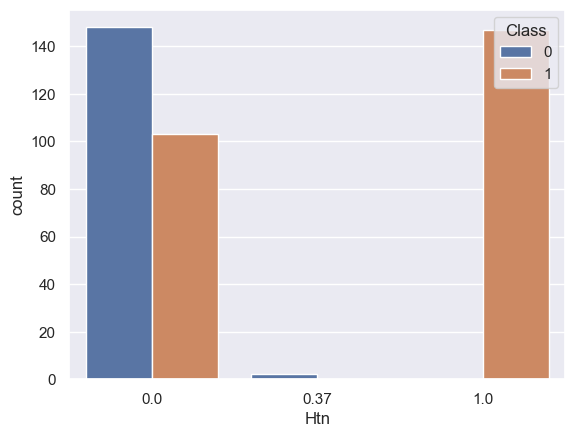

In [3]:
sns.countplot(data=df, x="Htn", hue="Class")

<AxesSubplot:xlabel='Rbc', ylabel='count'>

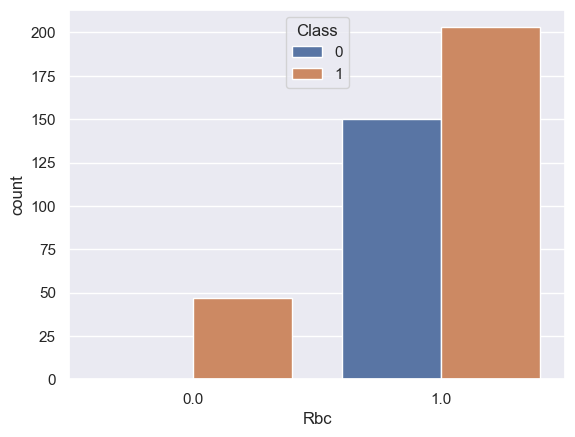

In [4]:
sns.countplot(data=df, x="Rbc", hue="Class")

<AxesSubplot:xlabel='Bp', ylabel='Count'>

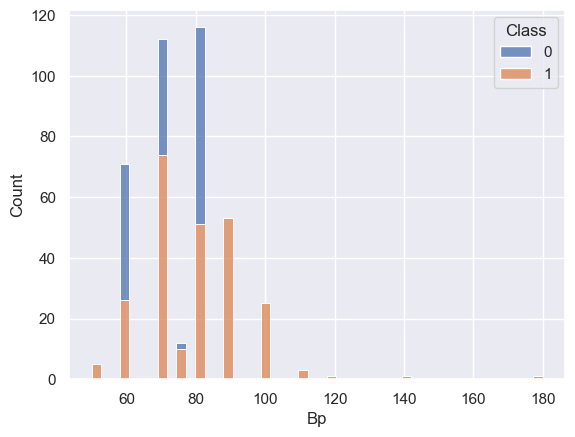

In [5]:
sns.histplot(data=df, x="Bp", hue="Class", multiple="stack")

### Data Preprocessing

In [6]:
df.isnull().sum()

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64

In [7]:
#replace 0 value with NaN
df_copy = df.copy(deep = True) #deep = True -> Buat salinan indeks dan data dalam dataframe
df_copy[['Bp','Sg','Bu','Sc','Sod','Pot','Hemo','Wbcc','Rbcc']] = df_copy[['Bp','Sg','Bu','Sc','Sod','Pot','Hemo','Wbcc','Rbcc']].replace(0,np.NaN)

# Showing the Count of NANs
print(df_copy.isnull().sum())

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64


### Check if the class label is balanced or not

1    250
0    150
Name: Class, dtype: int64


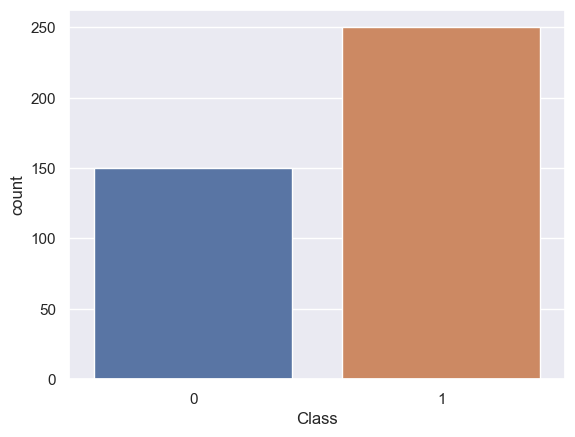

In [8]:
sns.countplot(df['Class'])
print(df.Class.value_counts())

### Do Oversampling Minority Class to Balance the class label

In [9]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df[(df['Class']==1)] 
df_minority = df[(df['Class']==0)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 n_samples= 250, 
                                 random_state=0)  
                                                  
# Combine majority class with upsampled minority class
df2 = pd.concat([df_minority_upsampled, df_majority])

0    250
1    250
Name: Class, dtype: int64


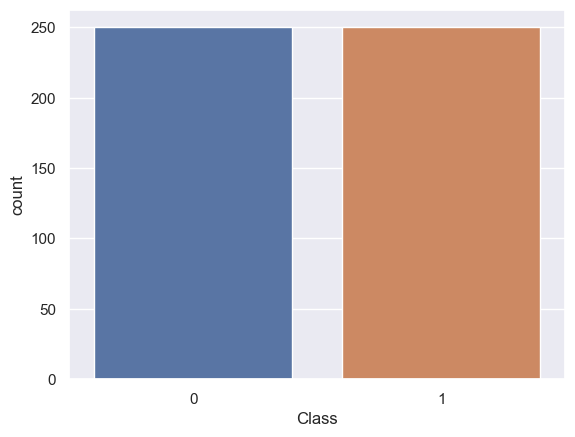

In [10]:
sns.countplot(df2['Class'])
print(df2.Class.value_counts())

### Check the Outlier using Boxplot

<AxesSubplot:xlabel='Bp'>

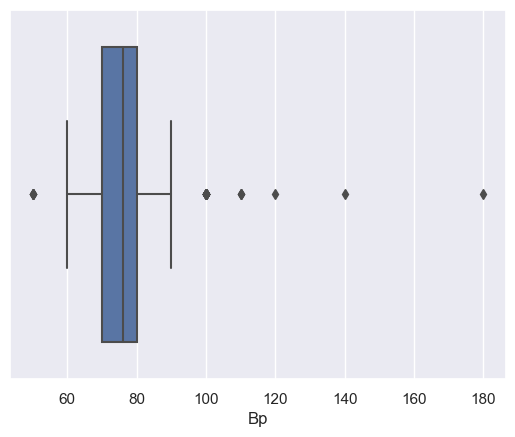

In [11]:
sns.boxplot(x=df2["Bp"])

<AxesSubplot:xlabel='Sg'>

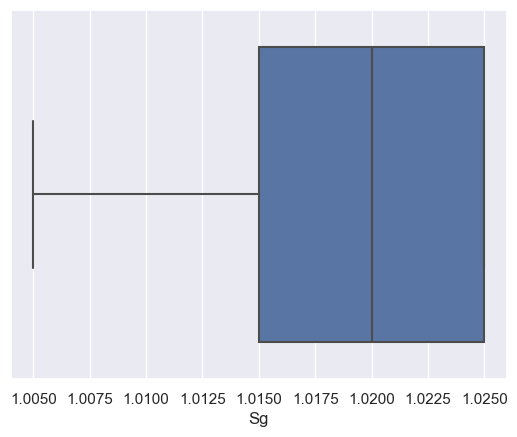

In [12]:
sns.boxplot(x=df2["Sg"])

<AxesSubplot:xlabel='Bu'>

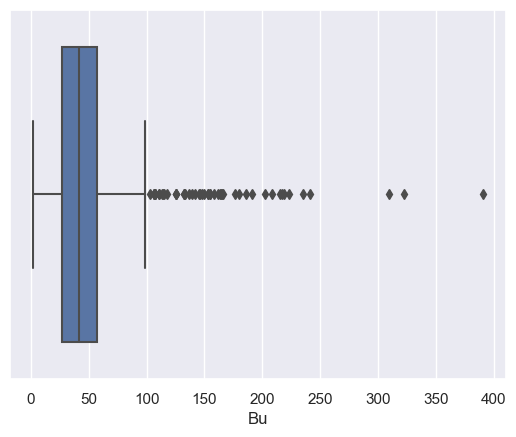

In [13]:
sns.boxplot(x=df2["Bu"])

<AxesSubplot:xlabel='Sc'>

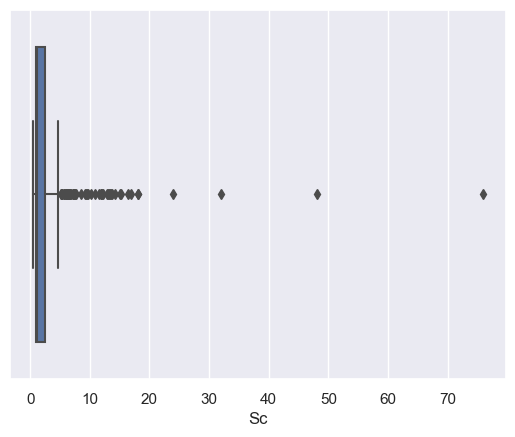

In [14]:
sns.boxplot(x=df2["Sc"])

<AxesSubplot:xlabel='Sod'>

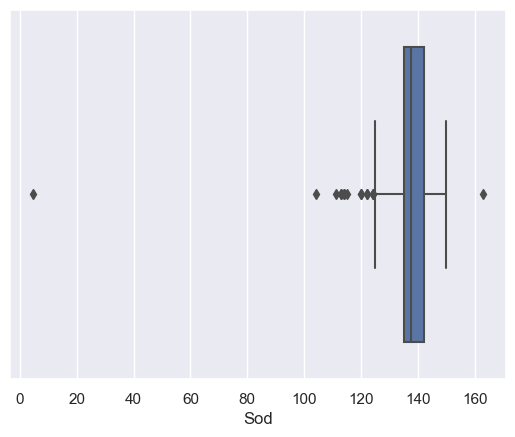

In [15]:
sns.boxplot(x=df2["Sod"])

<AxesSubplot:xlabel='Pot'>

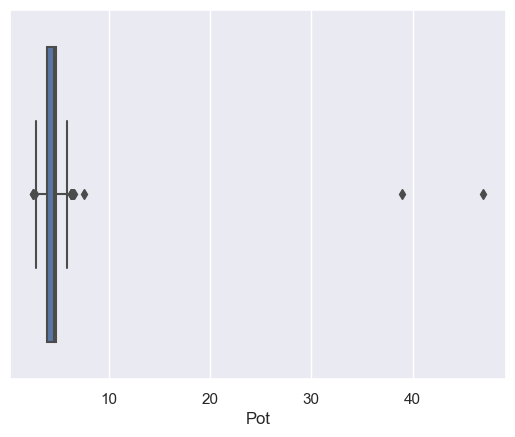

In [16]:
sns.boxplot(x=df2["Pot"])

<AxesSubplot:xlabel='Hemo'>

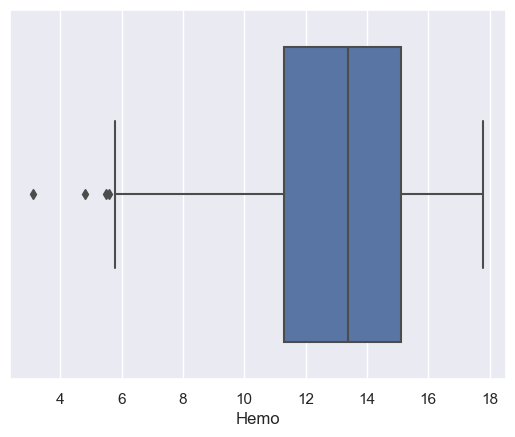

In [17]:
sns.boxplot(x=df2["Hemo"])

<AxesSubplot:xlabel='Wbcc'>

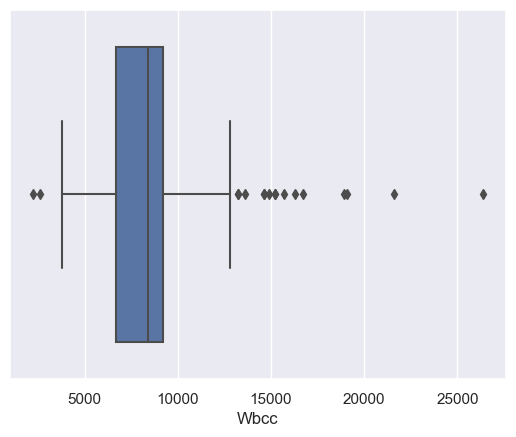

In [18]:
sns.boxplot(x=df2["Wbcc"])

<AxesSubplot:xlabel='Rbcc'>

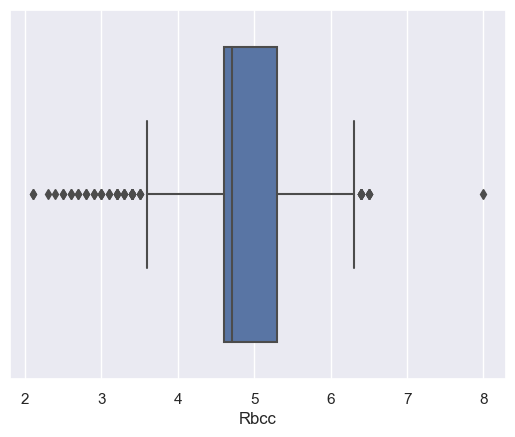

In [19]:
sns.boxplot(x=df2["Rbcc"])

###  Remove Outlier using Z-Score

In [20]:
import scipy.stats as stats
z = np.abs(stats.zscore(df2))
data_clean = df2[(z<3).all(axis = 1)] 
data_clean.shape

(420, 14)

### Heatmap Data Correlation

<AxesSubplot:>

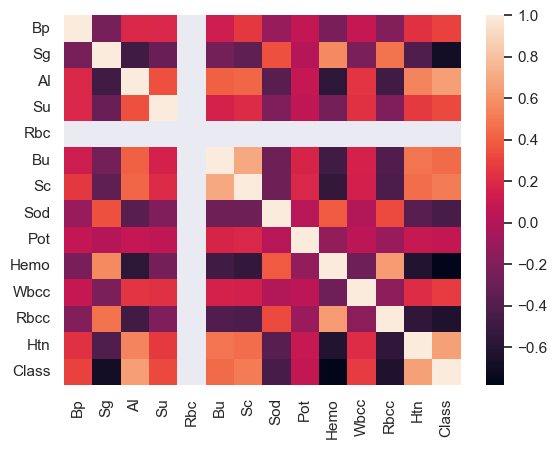

In [21]:
sns.heatmap(data_clean.corr(), fmt='.2g')

In [22]:
#Rbc attribute is irrlevant, so we have to remove it
data_clean2 = df.drop(columns=['Rbc'])

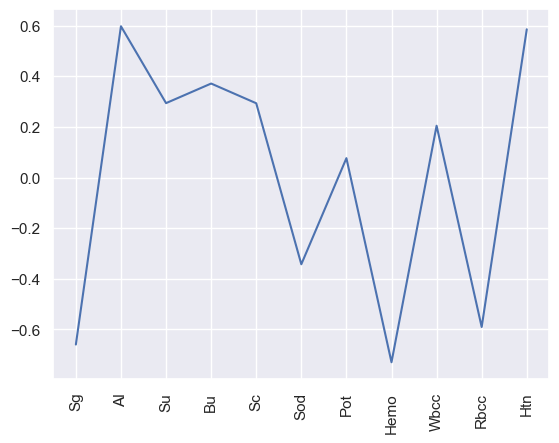

In [23]:
corr = data_clean2[data_clean2.columns[1:]].corr()['Class'][:-1]
plt.plot(corr)
plt.xticks(rotation=90)
plt.show()

### Machine Learning Model Building

In [24]:
X = data_clean2.drop('Class', axis=1)
y = data_clean2['Class']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

## Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

In [ ]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(rfc.score(X_test, y_test)*100)
plt.title(all_sample_title, size = 15)

### KNearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

In [ ]:
y_pred = knn.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(knn.score(X_test, y_test)*100)
plt.title(all_sample_title, size = 15)

### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=0)
ada.fit(X_train, y_train)

In [ ]:
y_pred = ada.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(ada.score(X_test, y_test)*100)
plt.title(all_sample_title, size = 15)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

In [ ]:
y_pred = lr.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(lr.score(X_test, y_test)*100)
plt.title(all_sample_title, size = 15)